# Salary estimation using K-Nearest Neighbour
This code is a machine learning model that predicts the salary range of a new employee based on their age, education, capital gain, and working hours per week.

The code first loads a dataset called 'salary.csv' using the pandas library and then converts the categorical variable 'income' into binary values (0 for <=50K and 1 for >50K).

After splitting the data into training and testing sets, the code uses the K-Nearest Neighbors (K-NN) algorithm to train the model on the training set. It then plots a graph to show the relationship between the error rate and the number of neighbors (K) used in the K-NN algorithm.

The code then asks for user input for the new employee's age, education, capital gain, and working hours per week. It uses the trained model to predict whether the new employee's salary range will be above or below 50K.

Finally, the code calculates the confusion matrix and accuracy score of the model on the test set.

<img src="data//Salary Estimation using K-Nearest Neighbour_page-0001.jpg">


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [17]:
# Load the dataset
dataset = pd.read_csv('data/salary.csv')

In [18]:
dataset.head(5)

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [19]:
# Map the income column to 0 and 1
income_map = {'<=50K': 0, '>50K': 1}
dataset['income'] = dataset['income'].map(income_map).astype(int)

In [20]:
dataset.head

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>

In [21]:
# Segregate dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)
X, Y = dataset.iloc[:, :-1].values, dataset.iloc[:, -1].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.330, random_state = 0)

In [23]:
# Scale the features using StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [24]:
# Calculate the error for different values of K
error = []
for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
optimal_k = error.index(min(error)) + 1

Text(0, 0.5, 'Mean Error')

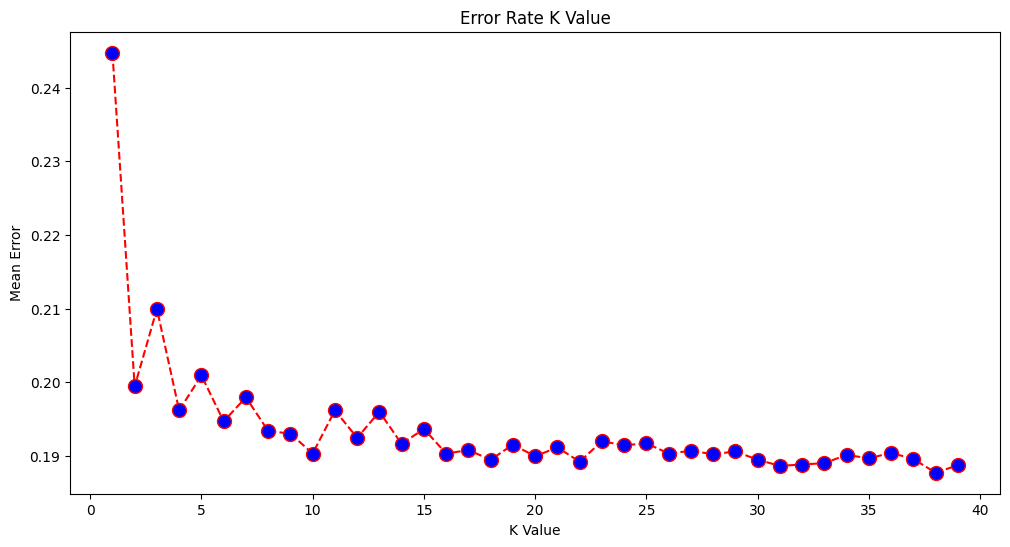

In [25]:
# Plot the error vs. K
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [26]:
# Train model with optimal K value
model = KNeighborsClassifier(n_neighbors=optimal_k, metric='minkowski', p=2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=38)

In [27]:
# Test model with new employee data
age = int(input("Enter New Employee's Age: "))
edu = int(input("Enter New Employee's Education: "))
cg = int(input("Enter New Employee's Captital Gain: "))
wh = int(input("Enter New Employee's Hour's Per week: "))
new_emp = sc.transform([[age, edu, cg, wh]])
result = model.predict(new_emp)

In [28]:
if result == 1:
    print("Employee might have a salary above 50K")
else:
    print("Employee might not have a salary above 50K")

Employee might have a salary above 50K


In [29]:
# Evaluate model
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred) * 100

In [30]:
# Display results
print("Confusion Matrix: ")
print(cm)
print("Accuracy of the Model: {0}%".format(accuracy))

Confusion Matrix: 
[[7676  456]
 [1561 1053]]
Accuracy of the Model: 81.23022520007444%
